https://blog.csdn.net/Cream_Cicilian/article/details/105524521

In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

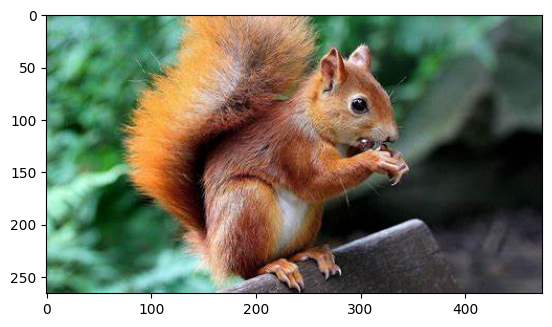

In [2]:
image = cv2.imread("../images/squirrel.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# cv2.filter2D

## Robert算子 x轴方向

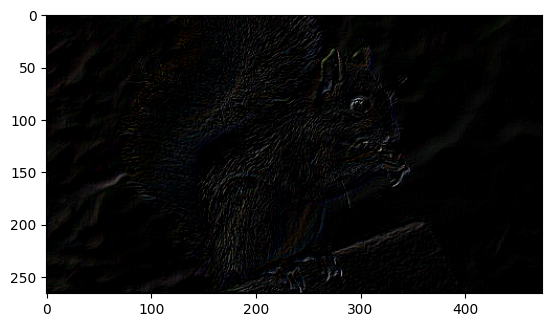

In [3]:
kernel: np.ndarray = np.array([[1, 0],
                               [0, -1]])
r = cv2.filter2D(
    src=image,
    ddepth=-1,      # 输出图像深度
    kernel=kernel,  # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

## Robert算子 y轴方向

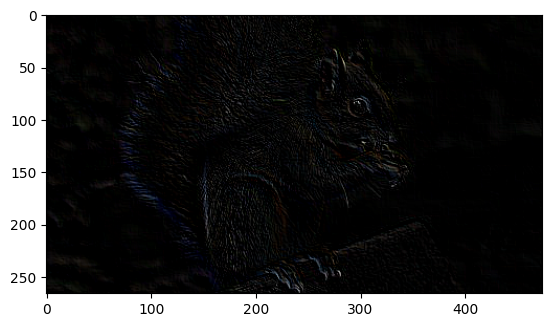

In [4]:
kernel: np.ndarray = np.array([[0, 1],
                               [-1, 0]])
r = cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=kernel, # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

## Sobel算子 x轴方向

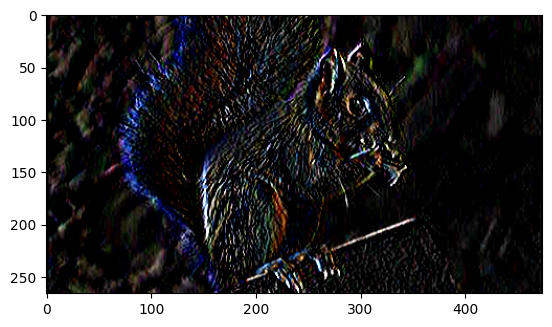

In [5]:
kernel: np.ndarray = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])
r = cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=kernel, # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

## Sobel算子 y轴方向

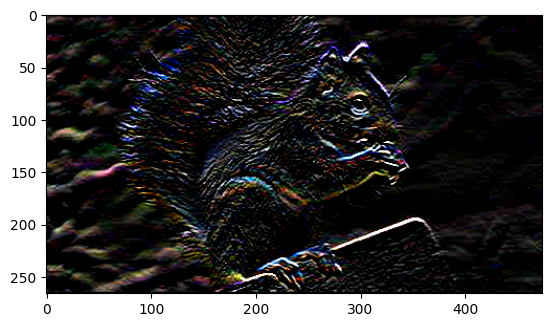

In [6]:
kernel: np.ndarray = np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]])
r = cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=kernel, # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

## 拉普拉斯算子

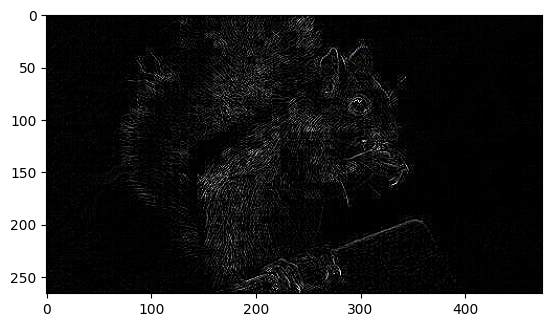

In [7]:
kernel: np.ndarray = np.array([[0, -1, 0],
                               [-1, 4, -1],
                               [0, -1, 0]])
r = cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=kernel, # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

## 自定义卷积核

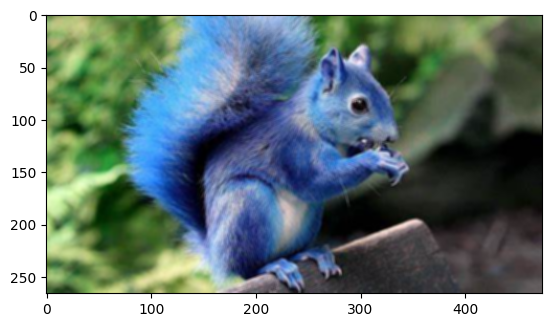

In [8]:
# 均值模糊
kernel: np.ndarray = np.array([[1, 1, 1],
                               [1, 1, 1],
                               [1, 1, 1]]) / 9
r = cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=kernel, # here
    anchor=[-1, -1],
    delta=0.0
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

# cv2.copyMakeBorder 填充边界

卷积边界问题
图像卷积的时候边界像素，不能被卷积操作，原因在于边界像素没有完全跟kernel重叠，所以当3x3滤波时候有1个像素的边缘没有被处理，5x5滤波的时候有2个像素的边缘没有被处理。

在卷积开始之前增加边缘像素，填充的像素值为0或者RGB黑色，比如3x3在

四周各填充1个像素的边缘，这样就确保图像的边缘被处理，在卷积处理之

后再去掉这些边缘。openCV中默认的处理方法是： BORDER_DEFAULT，此外

常用的还有如下几种：
- BORDER_CONSTANT – 填充边缘用指定像素值
- BORDER_DEFAULT - 默认
- BORDER_REFLECT - 反射边缘
- BORDER_REPLICATE – 和BORDER_REFLECT相同
- BORDER_WRAP – 用另外一边的像素来补偿填充

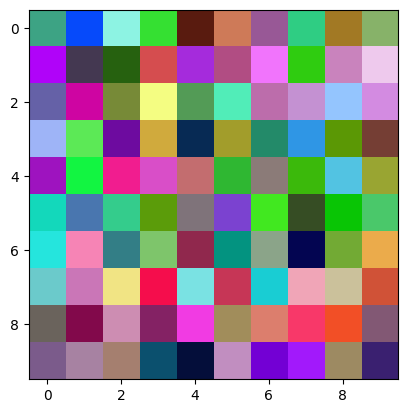

In [9]:
image1 = np.random.randint(0, 255, (10, 10, 3))
plt.imshow(image1)

## BORDER_CONSTANT

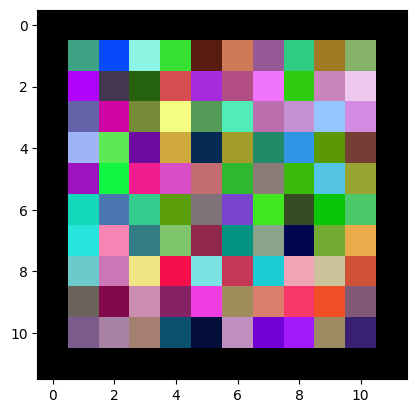

In [10]:
c = cv2.copyMakeBorder(
    src=image1,
    top=1,      # 上下左右填充宽度
    bottom=1,
    left=1,
    right=1,
    borderType=cv2.BORDER_CONSTANT, # 填充常量
    value=(0, 0, 0),                # 填充颜色
)
plt.imshow(c) # 一圈0

## BORDER_DEFAULT

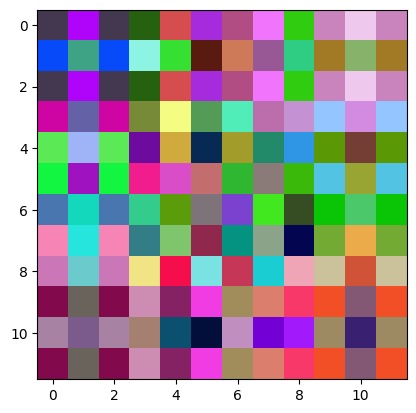

In [11]:
c = cv2.copyMakeBorder(
    src=image1,
    top=1,      # 上下左右填充宽度
    bottom=1,
    left=1,
    right=1,
    borderType=cv2.BORDER_DEFAULT,
)
plt.imshow(c)

## BORDER_REFLECT

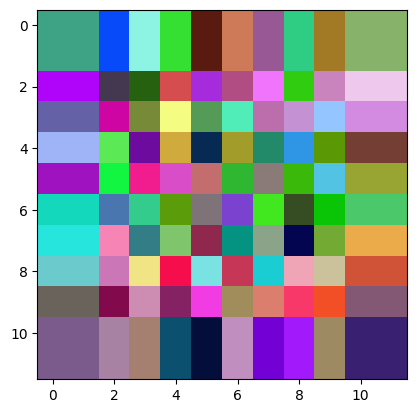

In [12]:
c = cv2.copyMakeBorder(
    src=image1,
    top=1,      # 上下左右填充宽度
    bottom=1,
    left=1,
    right=1,
    borderType=cv2.BORDER_REFLECT,
)
plt.imshow(c)

## BORDER_REPLICATE

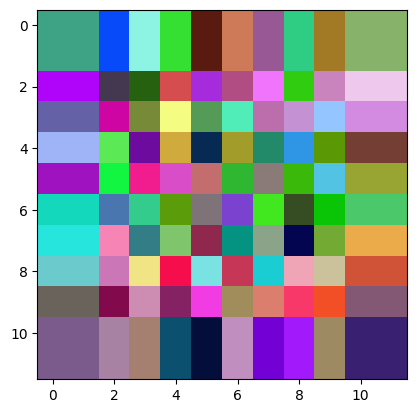

In [13]:
c = cv2.copyMakeBorder(
    src=image1,
    top=1,      # 上下左右填充宽度
    bottom=1,
    left=1,
    right=1,
    borderType=cv2.BORDER_REPLICATE, # 和BORDER_REFLECT相同
)
plt.imshow(c)

## BORDER_WRAP

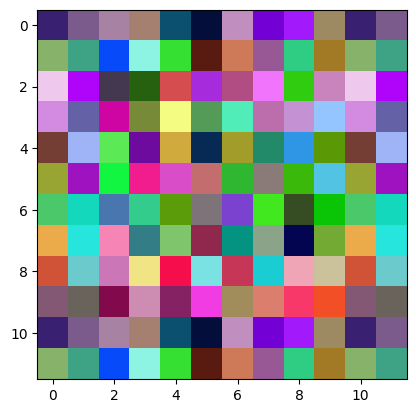

In [14]:
c = cv2.copyMakeBorder(
    src=image1,
    top=1,      # 上下左右填充宽度
    bottom=1,
    left=1,
    right=1,
    borderType=cv2.BORDER_WRAP,
)
plt.imshow(c)